In [1]:
from google.colab import drive
drive.mount('/content/drive')
import shutil
shutil.copytree("drive/MyDrive/FDL/TEP","TEP")

Mounted at /content/drive


'TEP'

Now we want to evaluate the latency, detection power and false alarm rate of our TCNAE model, given a few candidate thresholds

In [1]:
thresholds = [1.6917676789529184, 1.7917676789529184, 1.8917676789529185]

In [2]:
import pandas as pd

In [3]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, SpatialDropout1D, Add, Dense, AveragePooling1D, Concatenate, UpSampling1D
from tensorflow.keras.models import Model
from keras.regularizers import L2

In [ ]:
norm_train = pd.read_parquet(".../data/TEP_FaultFree_Training.parquet")

In [5]:
## for train set(we want means and std)
simulation_length = 500
num_simulations = 500
num_features = 52

X = norm_train.drop(["simulationRun","sample","faultNumber"],axis=1)
X = X.values.reshape((num_simulations, simulation_length, num_features))

In [6]:
import numpy as np

In [7]:
X_train_mean = np.mean(X, axis=(0, 1))
X_train_std = np.std(X, axis=(0, 1))

In [8]:
del norm_train, X

In [ ]:
# Note: normal and anomalous train sets dont have the same shape(number of sims),
#  we will evaluate them separately in terms of FAR and Latency respectively

In [ ]:
norm_test = pd.read_parquet(".../data/TEP_FaultFree_Testing.parquet")

In [11]:
# Preparing normal test set
simulation_length = 960
num_simulations = 500
num_features = 52

test_norm = norm_test.drop(["simulationRun","sample","faultNumber"],axis=1)

In [12]:
del norm_test

In [13]:
test_norm = test_norm.values.reshape((num_simulations, simulation_length, num_features))

In [14]:
test_norm.shape

(500, 960, 52)

In [15]:
test_norm_scaled = (test_norm - X_train_mean)/X_train_std

In [ ]:
model00 = tf.keras.models.load_model(".../models/TCNAE00.keras")

In [17]:
model00.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None, 52)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, None, 64)  │     10,048 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_34[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_16 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_16[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_36[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_17 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_17[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_38[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_18 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_18[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_40[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_19 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_19[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_42 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_42[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat

 Total params: 718,798 (2.74 MB)

 Trainable params: 238,916 (933.27 KB)

 Non-trainable params: 2,048 (8.00 KB)

 Optimizer params: 477,834 (1.82 MB)

In [18]:
norm_preds = model00.predict(test_norm_scaled)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step


In [19]:
reconstruction_error = np.mean(np.square(norm_preds - test_norm_scaled), axis=-1) #same names as tuning part

In [20]:
#clearing colab space
del test_norm, test_norm_scaled

In [21]:
reconstruction_error.shape

(500, 960)

Now we want to evaluate the false alarm rate

In [22]:
false_alarm_rates = []
#for each threshold, compute the false alarm rate as sum(detections in normal inputs)/num(inputs)
for threshold in thresholds:
    false_alarms = []
    for error in reconstruction_error:
        labels = (error > threshold).astype(int)
        false_alarms.append((labels.sum() > 0).astype(int))
    false_alarm_rates.append(sum(false_alarms)/len(false_alarms))

In [23]:
false_alarm_rates

[0.032, 0.01, 0.002]

Naturally, the highest threshold has the lowest false alarm rate, but all three are not, bad, with the last two being very low

Next we want to do something similar on the anomalous train set: evaluate detection latency(and missed detections)

In [25]:
anom_test = pd.read_parquet("./data/TEP_Faulty_Testing.parquet")

In [26]:
test_anom = anom_test.drop(["simulationRun","sample","faultNumber"],axis=1)
del anom_test

In [27]:
test_anom = test_anom.values.reshape((10000,simulation_length,num_features))

In [28]:
test_anom_scaled = (test_anom - X_train_mean)/X_train_std

In [29]:
onset = 160 #anomaly appears 8hrs in
anom_labels = np.zeros((simulation_length)) #since all the same labels, we dont make on for every sim like in tuning file
anom_labels[:onset] = 0
anom_labels[onset:] = 1

In [30]:
def compute_latency(true_labels, pred_labels, onset=onset):
    # Only consider time steps after onset
    for i in range(onset, len(true_labels)):
        if pred_labels[i] == 1:
            return i - onset
    return len(true_labels)  # No detection after onset

In [31]:
anom_preds = model00.predict(test_anom_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step


In [32]:
anom_preds.shape

(10000, 960, 52)

In [33]:
anom_rec_error = np.mean(np.square(anom_preds - test_anom_scaled), axis=-1)

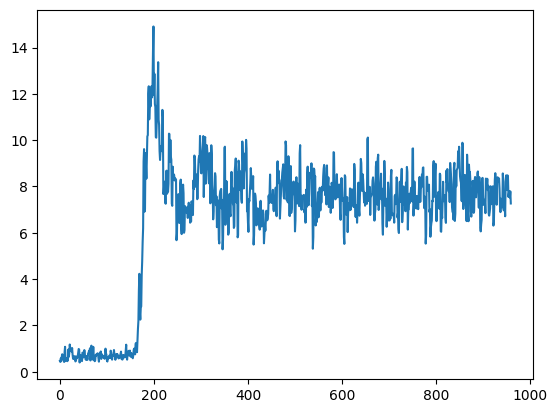

In [34]:
import matplotlib.pyplot as plt
plt.plot(anom_rec_error[0])

In [35]:
latencies = []

for threshold in thresholds:
    latency = []
    for error in anom_rec_error:
        latency.append(compute_latency(anom_labels,(error > threshold).astype(int)))
    latencies.append(np.mean(latency)) #average latencies
latencies

[249.6992, 275.5577, 288.7804]

As a middle ground, we can seelct the third threshold as the "best" among the candidates, as the first has a pretty higher FAR, and the gap between the second and third average latencies isnt that big.

In [36]:
# How many anomalous detections does it miss?
t3_misclass = []
for error in anom_rec_error:
    missclass = int((compute_latency(anom_labels,(error > thresholds[-1]).astype(int)) == simulation_length))
    t3_misclass.append(missclass)

In [38]:
sum(t3_misclass)/10000 #missed anomaly rate

0.2744

In [ ]:
latencies[-1]*3/60 #hours on average

14.43902

In [40]:
# When we do detect an anomaly, what is the latency?
t3_detect_latency = []
for error in anom_rec_error:
    detect_latency = compute_latency(anom_labels,(error > thresholds[-1]).astype(int))
    if detect_latency != simulation_length:
        t3_detect_latency.append(detect_latency)

In [41]:
sum(t3_detect_latency)/len(t3_detect_latency)

34.94542447629548

In [ ]:
sum(t3_detect_latency)/len(t3_detect_latency)*3/60 #when we do detect an anomaly, it takes little less than 2hrs on average

1.747271223814774

The third threshold:
- Detects 73% of anomalies 
- takes 14 hours on average to detect an anomaly(boosted by cases in which we dont detect, that count as latency=simulation_length)
- When an anomaly IS detected, it takes 1.74 hours on average
- has a FAR of 0.2%

Can also check latency of successful detections for other thresholds, chosen threshold is better...

In [43]:
# When we do detect an anomaly, what is the latency?
t1_detect_latency = []
for error in anom_rec_error:
    detect_latency = compute_latency(anom_labels,(error > thresholds[0]).astype(int))
    if detect_latency != simulation_length:
        t1_detect_latency.append(detect_latency)

In [44]:
sum(t1_detect_latency)/len(t1_detect_latency)*3/60

2.7059813799260297

In [45]:
# When we do detect an anomaly, what is the latency?
t2_detect_latency = []
for error in anom_rec_error:
    detect_latency = compute_latency(anom_labels,(error > thresholds[1]).astype(int))
    if detect_latency != simulation_length:
        t2_detect_latency.append(detect_latency)
sum(t2_detect_latency)/len(t2_detect_latency)*3/60

2.1504354233654874

In [46]:
model00.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None, 52)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, None, 64)  │     10,048 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_34[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_16 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_16[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_36[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_17 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_17[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_38[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_18 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_18[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_40[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_19 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, None, 64)  │          0 │ re_lu_19[0][0]    │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_42 (Conv1D)  │ (None, None, 64)  │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None, 64)  │        256 │ conv1d_42[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, None, 64)  │          0 │ batch_normalizat

 Total params: 718,798 (2.74 MB)

 Trainable params: 238,916 (933.27 KB)

 Non-trainable params: 2,048 (8.00 KB)

 Optimizer params: 477,834 (1.82 MB)